# This jupyter notebook is prepared by Tyler Beach

# A4 Unsupervised Learning algorithms (Total 75 points)

## 1. Feature Preprocessing (Total 5 points)

### 1.1 Import numpy, matplotlib, pandas and seaborn (1pt)

In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

### 1.2 Load the dataset from given *.csv file using *pandas* (1pt)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_name = '/content/drive/My Drive/Wine_Quality_Data.csv'
with open(file_name, 'r') as file:
  df = pd.read_csv(file);


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.3 We want to use only the numeric features. So drop the 'color' column from the dataframe. (1pt)

In [ ]:
del df['color']
print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

### 1.4 Scale the features using Scikitlearn's StandardScaler library (2pt)

In [ ]:
import sklearn.preprocessing as preprocessing

columns = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]
stdscl = preprocessing.StandardScaler()
df[columns] = stdscl.fit_transform(df[columns])
print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free_sulfur_dioxide  

## 2. KMeans Clustering with PCA selection (Total 25 points)

### 2.1 Import PCA from scikitlearn's decomposition library.  (3pt)
Use fit_transform method on the scaled data to get the PCA transformed data.

In [ ]:
from sklearn.decomposition import PCA
PCAinstance = PCA()
PCAdata = PCAinstance.fit_transform(df)

### 2.2 Plot the cumulative sum of explained_variance_ratio_. You can retrieve this quantity from the PCA-transformed data in the previous step. (4pt)
This plot should show the set of features along X axis and proportion of variance explained by each of the features along Y axis. You can use matplotlib's plot and step function for this.

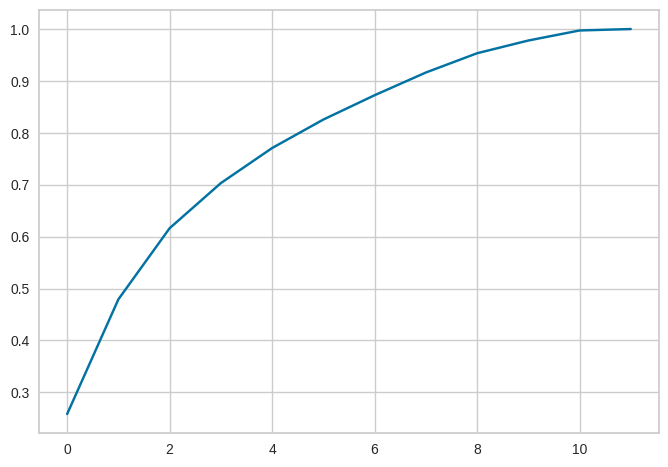

In [ ]:
plt.pyplot.plot(np.cumsum(PCAinstance.explained_variance_ratio_))

### 2.3 How many features are required to capture at least 90% of the variance? Drop the other features. (3pt)
You can get this number visually from the cumulative sum of explained_variance_ratio_ plot in the previous step. Alternatively, you can use numpy's *argwhere* function to find the index of the first element in the cumulative sum array that is greater than 0.9.

In [ ]:
np.argwhere(np.cumsum(PCAinstance.explained_variance_ratio_) > 0.9)
# Index 7 is when we pass 0.9
# There are 11 total features (indices 0 through 10 = 11 total)
# This means we can drop indices 8, 9, and 10.
# So, only 8 features are required to capture at least 90% of the variance.

df_select = df.copy()
del df_select['pH']
del df_select['sulphates']
del df_select['alcohol']
print(df_select)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free_sulfur_dioxide  

### 2.4 Import KElbowVisualizer from yellowbrick.cluster library and fit the data to it. Visualize the elbow curve and find the optimal number of clusters. (6pt)

*KElbowVisualizer* is a useful visualization tool for using Elbow method with K-Means clustering algorithm. The official documentation and example can be found here:
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, n_init='auto'),
                 k=(1, 10))

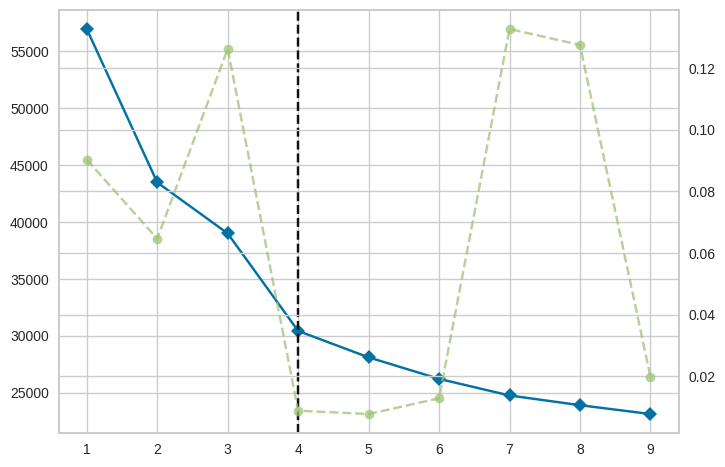

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_select)

### 2.5 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data to it. (2pt)

In [ ]:
optmodel = KMeans(n_clusters=4, n_init='auto').fit(df_select)

### 2.6 Get the labels from the fitted KMeans object (*labels_* method). Import *silhouette_score* from scikitlearn's metrics library. Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score. (1+1+2+3 =7pts)

In [ ]:
from sklearn.metrics import silhouette_score

optmodel.labels_
print(np.unique(optmodel.labels_))
total = optmodel.labels_.size

for i in range(4):
  iCount = (optmodel.labels_ == i).sum()
  percentage = iCount/total
  print(str(i) + ": " + str(percentage))

score = silhouette_score(df, optmodel.labels_)
print("\n" + "Silhouette Score: " + str(score))

[0 1 2 3]
6497
0: 0.45267046329074956
1: 0.10220101585347083
2: 0.28059104201939356
3: 0.16453747883638603

Silhouette Score: 0.2721722966809188


## 3. KMeans Clustering without PCA selection (Total 15 points)

### 3.1 Use KElbowVisualizer to find the optimal number of clusters for the data without PCA selection (ie the data with all the features). Also plot the score (similar to step 2.4) (3pt)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, n_init='auto'),
                 k=(1, 10))

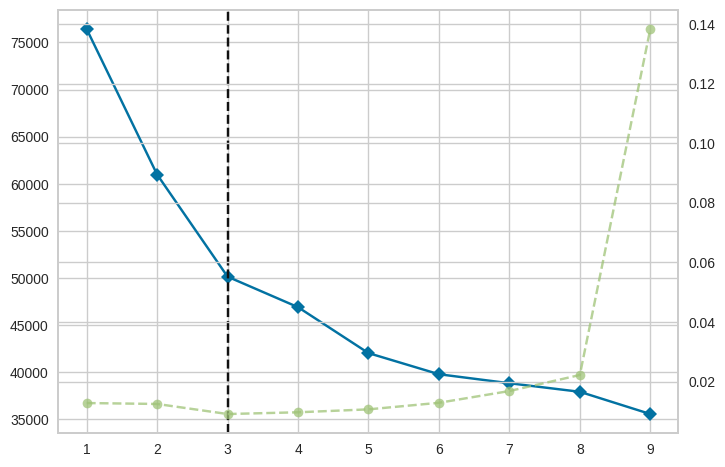

In [ ]:
# Now using the original dataframe "df". In #2, I used "df_select", which was the one with PCA selection.
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)

### 3.2 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data (without PCA selection) to it. (2pt)

In [ ]:
optmodel = KMeans(n_clusters=3, n_init='auto').fit(df)

### 3.3 Retrieve the class labels from this KMeans object (from model's *labels_* method). Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score for the fitted data (without PCA selection) (2+2+3 =7pt)

In [ ]:
from sklearn.metrics import silhouette_score

optmodel.labels_
print(np.unique(optmodel.labels_))
total = optmodel.labels_.size

for i in range(4):
  iCount = (optmodel.labels_ == i).sum()
  percentage = iCount/total
  print(str(i) + ": " + str(percentage))

score = silhouette_score(df, optmodel.labels_)
print("\n" + "Silhouette Score: " + str(score))

[0 1 2]
0: 0.4525165460981992
1: 0.24719101123595505
2: 0.30029244266584576
3: 0.0

Silhouette Score: 0.22006192316337317


### 3.4 Discussion: Did PCA selection help in clustering (did it yield higher silhouette score)? Why or why not? (2-3 sentences) (3pt)

It appears that PCA selection helped obtain a higher score. We can see that when we used df_select (the PCA selection version of the data) in #2, we got a silhouette score of ~0.272; however, using just the original df got a score of ~0.22. Since higher silhouette scores are better and the PCA selection version had a slightly higher score, it appears PCA selection had a positive impact.

## 4. Hierarchical (agglomerative) clustering (Total 10 points)

### 4.1 Import dendogram and linkage from scipy.cluster.hierarchy library. Use the *linkage* function to fit the data and plot the dendogram. (5pt)
An example is provided in the lecture slide. 

Official Documentation:
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

With the *linkage* function, you can use different linkage methods. For this assignment you can use 'ward' method.

(https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage:~:text=method%3D%E2%80%99ward%E2%80%99%20uses,the%20incremental%20algorithm.) 


(This can take a while to complete running)

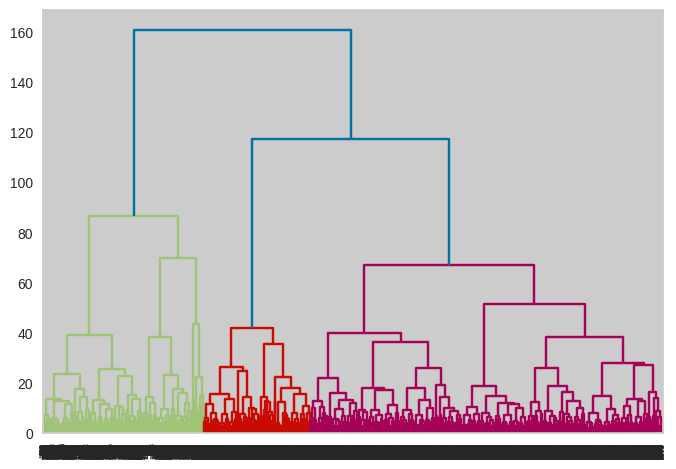

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
L = linkage(df_select, 'ward') 
dn = dendrogram(L)

### 4.2 Import AgglomerativeClustering from sklearn.cluster library. Use the fit_predict method to fit the data and print the corresponding silhouette score. (5pt)
(Use the above dendogram to find a suitable value for the number of clusters (*k*) in AgglomerativeClustering, OR run the algorithm multiple times with different values of *k* and print the *k* with the highest silhouette score)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# I think it's k=3 because 3 colors on the dendogram, not including blue

clusterk3 = AgglomerativeClustering(n_clusters=3).fit_predict(df_select)
score3 = silhouette_score(df_select, clusterk3)
print("Silhouette Score: " + str(score3))

Silhouette Score: 0.23081088193846114


## 5. DBSCAN Clustering (Total 20 points)

### 5.1 Import *NearestNeighbors* from sklearn.neighbors library. Use the *fit* method to fit the data with n_neighbors=4. Then use *kneighbors* method to find the distance of the 4th nearest neighbor for each point. Sort and plot the distances. (6pt)
This plots the elbow curve (distance of the 4th nearest neighbor for each point). This is useful for finding the optimal value of epsilon for DBSCAN clustering. 

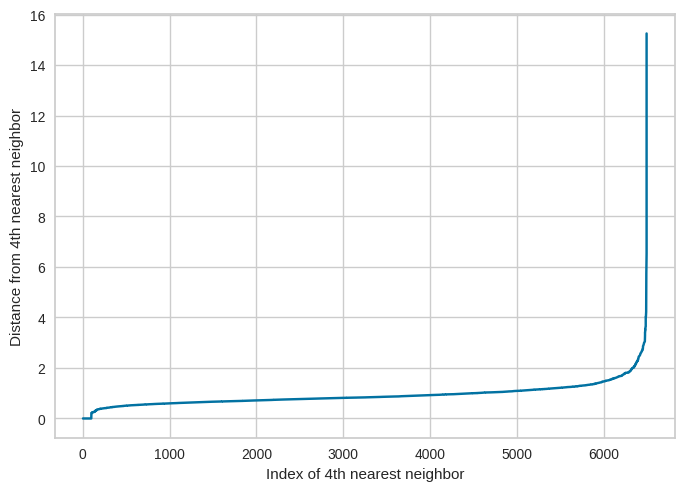

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt 
neigh = NearestNeighbors(n_neighbors=4)
nnres = neigh.fit(df_select)
knres = neigh.kneighbors()
#In the distances array part of knres, for each individual array it's the i=3 element that is the distance of the 4th nearest neighbor.
#And in the indices array part, for each individual array the i=3 element is the index of the 4th nearest neighbor.

#knres[0] is array of distance arrays, 4th distance is at knres[0][i][3]
#knres[1] is array of index arrays, 4th index is at knres[1][i][3]

fourthDistances = np.empty(1)
fourthIndices = np.empty(1)
for i in range(len(knres[1])):
  fourthDistances = np.append(fourthDistances, knres[0][i][3])
  fourthIndices = np.append(fourthIndices, knres[1][i][3])

fourthDistances.sort()
fourthIndices.sort()

plt.plot(fourthIndices, fourthDistances)
plt.xlabel("Index of 4th nearest neighbor")
plt.ylabel("Distance from 4th nearest neighbor")
plt.show()

### 5.2 From the distance plot above, estimate the 'elbow' point. The distance at the elbow point will be used as epsilon in the DBSCAN model. (2pt)
Simply write the distance value in the cell below.

Distance at the elbow point is approximately ~1.9

### 5.3 Import DBSCAN from sklearn.cluster library. Instantiate a DBSCAN model (with eps set to the elbow point suggested by above plot, and min_samples=10). (2pt)
(You can experiment with several values of eps and min_samples to find the best combination)

In [ ]:
from sklearn.cluster import DBSCAN
dbsmodel = DBSCAN(eps=1.9, min_samples=10)

### 5.4 Use the fit method to fit your model to the data. Print (1) the value counts of unique class labels (from model's *labels_* method) in percentage, and (2) print the corresponding silhouette score. (2+2+2=6pt)

In [ ]:
from sklearn.metrics import silhouette_score

dbs = dbsmodel.fit(df_select)

dbs.labels_
print(np.unique(dbs.labels_))
total = dbs.labels_.size

for i in range(5):
  i = i - 1               #I noticed I was only getting -1 and 0 as results so this allowed me to include that in the printing
  iCount = (dbs.labels_ == i).sum()
  percentage = iCount/total
  print(str(i) + ": " + str(percentage))

score = silhouette_score(df, dbs.labels_)
print("\n" + "Silhouette Score: " + str(score))

[-1  0]
-1: 0.019239649068800987
0: 0.9807603509311991
1: 0.0
2: 0.0
3: 0.0

Silhouette Score: 0.4388917612830412


### 5.5 Use seaborn's pairplot to plot the data with *hue* as the cluster labels obtained from DBSCAN. (2pt)
Set *corner* to *True* for a better visualization.

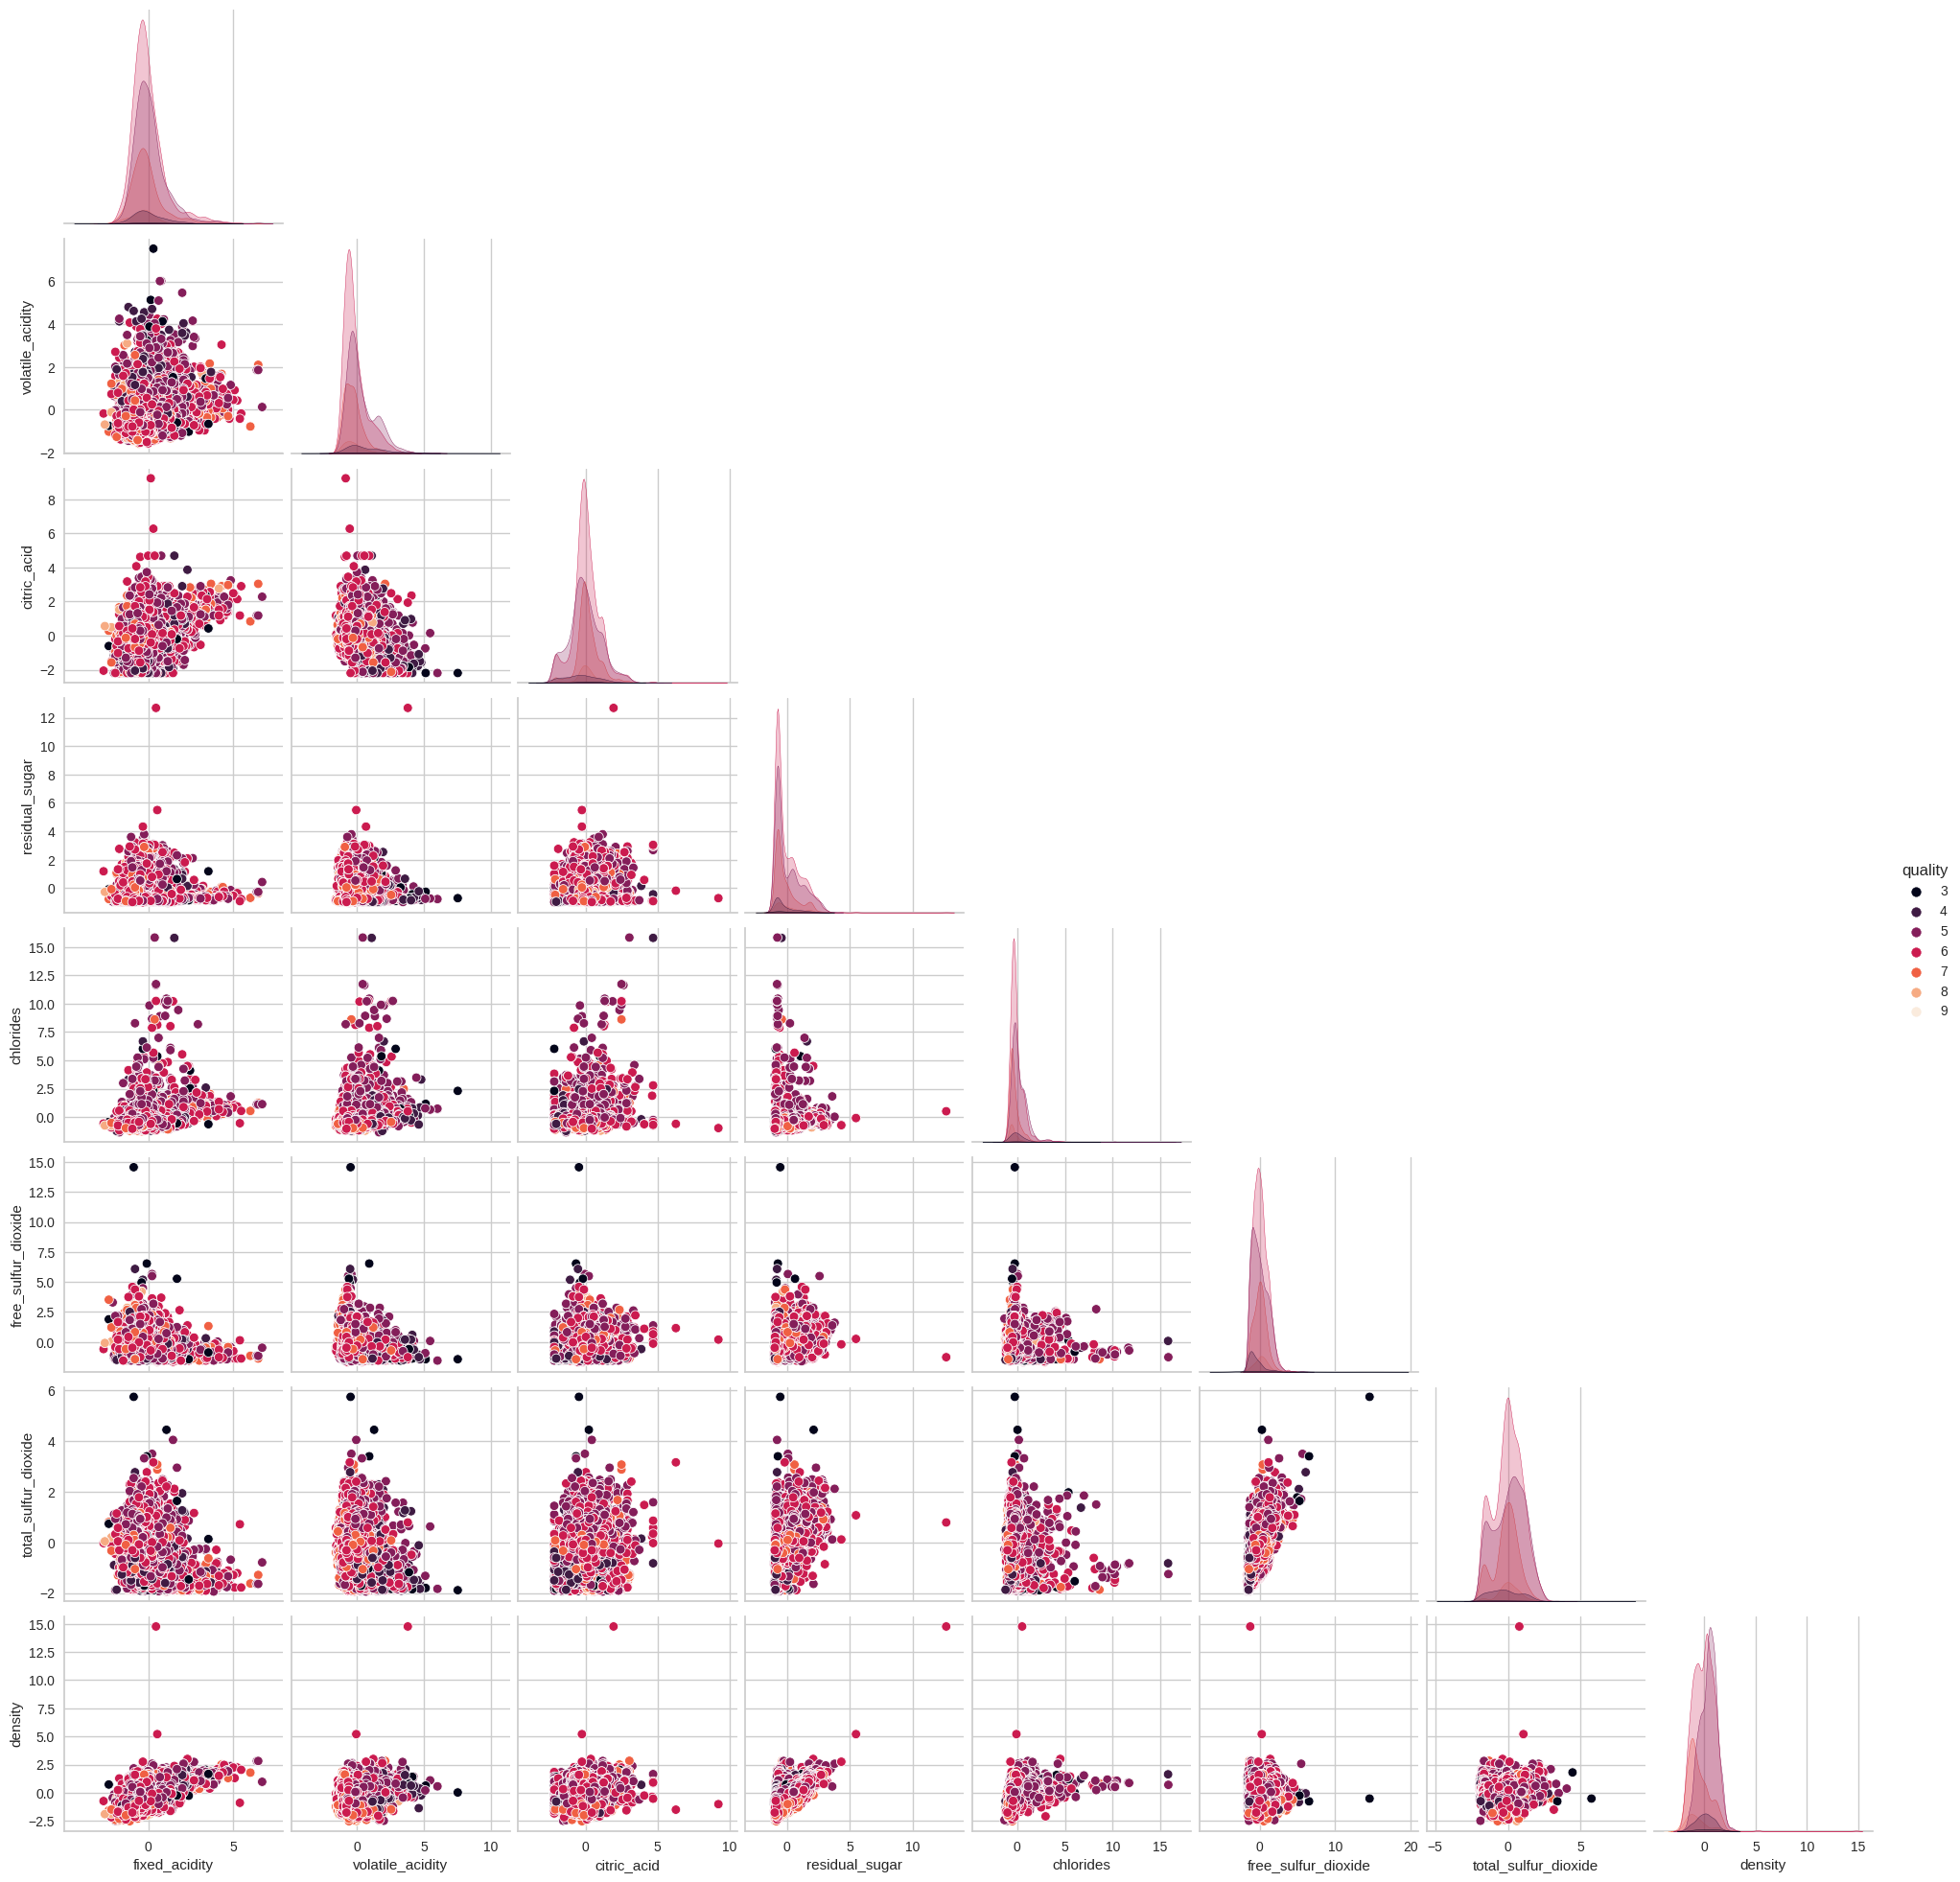

In [ ]:
# "Hue is the column name you make to store the labels in the dataframe"
sns.pairplot(df_select, hue="quality", corner="True", palette="rocket")
# I wanted to use a wine-themed color palette :)


## 6. Discussion: which clustering algorithm performed the best? Why? (2pt)
 (2-3 sentences)

DBSCAN performed the best. It had the highest silhouette score. Since a higher silhouette score indicates better performance, DBSCAN therefore performed the best of all models.